<a href="https://colab.research.google.com/github/godha112/fer/blob/master/fer12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import AveragePooling2D, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from google.colab import drive

Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/fer data/train.csv'
train = pd.read_csv(path) 

In [0]:
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

In [0]:
def string_to_img(data):
    datapoints = data['pixels'].tolist()
    x = []
    for i in datapoints:
        xx = [int(j) for j in i.split(' ')]
        xx = np.array(xx).reshape(48,48)
        x.append(xx.astype('float32'))
    x = np.array(x)
    y = data.iloc[:,0].values
    return x,y

In [0]:
X_train, Y_train = string_to_img(train)

In [6]:
Y_train.shape

(28709,)

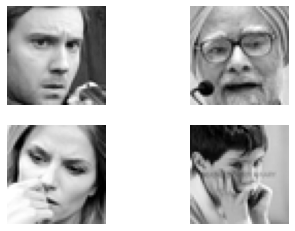

In [7]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.axis('off')

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=42)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state=41)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(23254, 48, 48)
(23254,)
(2871, 48, 48)
(2871,)
(2584, 48, 48)
(2584,)


In [9]:
x_train, y_train = X_train, Y_train
x_val, y_val = X_val, Y_val
x_test, y_test = X_test, Y_test
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(23254, 48, 48)
(23254,)
(2584, 48, 48)
(2584,)
(2871, 48, 48)
(2871,)


In [10]:
x_train -= np.mean(X_train, axis=0)
x_train /= np.std(x_train, axis=0)
x_train = np.resize(x_train,(x_train.shape[0],48,48,1))
y_train = to_categorical(Y_train)
print(x_train.shape)
print(y_train.shape)

(23254, 48, 48, 1)
(23254, 7)


In [11]:
x_test -= np.mean(X_test, axis=0)
x_test /= np.std(x_test, axis=0)
x_test = np.resize(x_test,(x_test.shape[0],48,48,1))
y_test = to_categorical(Y_test)
print(x_test.shape)
print(y_test.shape)

(2871, 48, 48, 1)
(2871, 7)


In [12]:

x_val -= np.mean(X_val, axis=0)
x_val /= np.std(x_val, axis=0)
x_val = np.resize(x_val,(x_val.shape[0],48,48,1))
y_val = to_categorical(Y_val)
print(x_val.shape)
print(y_val.shape)

(2584, 48, 48, 1)
(2584, 7)


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True, 
        vertical_flip=False,fill_mode = 'nearest')  
datagen.fit(x_train)

In [0]:
train_it = datagen.flow(x_train, y_train, batch_size=64)

In [0]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [0]:
model = Sequential()

model.add(Conv2D(filters = 64, input_shape = (48,48,1), kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation = 'softmax'))

In [0]:
model.compile('adamax', loss = 'categorical_crossentropy', metrics = ["accuracy"])

In [18]:
model.fit_generator(train_it, steps_per_epoch=len(x_train)/64, epochs = 200, verbose=2, callbacks=[lr_reduce], validation_data = (x_val,y_val), validation_steps=len(x_val)/64)

Epoch 1/200
 - 31s - loss: 2.0478 - accuracy: 0.1984 - val_loss: 1.8614 - val_accuracy: 0.2438
Epoch 2/200
 - 25s - loss: 1.8588 - accuracy: 0.2248 - val_loss: 1.8493 - val_accuracy: 0.2438
Epoch 3/200
 - 25s - loss: 1.8316 - accuracy: 0.2342 - val_loss: 1.8276 - val_accuracy: 0.2438
Epoch 4/200
 - 26s - loss: 1.8193 - accuracy: 0.2455 - val_loss: 1.8239 - val_accuracy: 0.2527
Epoch 5/200
 - 25s - loss: 1.8101 - accuracy: 0.2459 - val_loss: 1.8134 - val_accuracy: 0.2438
Epoch 6/200
 - 25s - loss: 1.7997 - accuracy: 0.2461 - val_loss: 1.8120 - val_accuracy: 0.2438
Epoch 7/200
 - 25s - loss: 1.7758 - accuracy: 0.2611 - val_loss: 1.7307 - val_accuracy: 0.2902
Epoch 8/200
 - 25s - loss: 1.7325 - accuracy: 0.2877 - val_loss: 1.7102 - val_accuracy: 0.2999
Epoch 9/200
 - 25s - loss: 1.6697 - accuracy: 0.3204 - val_loss: 1.6242 - val_accuracy: 0.3127
Epoch 10/200
 - 25s - loss: 1.5877 - accuracy: 0.3689 - val_loss: 1.4760 - val_accuracy: 0.3874
Epoch 11/200
 - 25s - loss: 1.5281 - accuracy: 0.

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)      

In [21]:
model.evaluate(x_test,y_test,batch_size = 64,verbose=1)

2871/2871 [==============================] - 1s 315us/step


[1.0547981427464075, 0.6572622656822205]

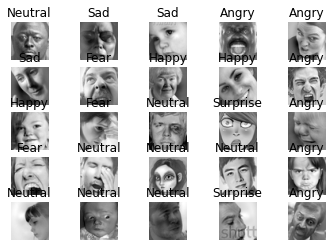

In [25]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(X_test[i],cmap = plt.get_cmap('gray'))
    img = np.resize(x_test[i],(1,48,48,1))
    pred_id = np.argmax(model.predict(img))
    #print(pred_id,np.argmax(y_test[i]))
    plt.title(emotions[pred_id])

In [0]:
model.save("fer_model3.h5")

In [0]:
from google.colab import files
files.download('fer_model2.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 56872, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil